# 线性回归

该算法是想给**一个依赖标量的变量y**和**一个或多个独立变量x**之间的关系建模。

给定：

- 数据集合 $\{(x_1,y_1),\ldots,(x_m,y_m)\}$
- 每个 $x_i$ 都是 $d$ 维向量 $(x_1,\ldots,x_d)$
- 每个 $y_i$ 都是一个标量目标变量

线性回归模型可以用非常简单的神经网络表达：

- 拥有一个实值权重向量 $(w_1,\ldots,w_d)$
- 拥有一个实值偏置 $b$
- 采用恒等函数作为激活函数

一个线性回归模型可以用：

- 梯度下降

或

- 正规方程（封闭解）（ $w=(X^TX)^{-1}X^Ty$ ）

  - 这里的 $X$ 矩阵 $(m,n_{features})$ 保有全部训练样本。
  - 正规方程要求计算 $X^TX$ 的逆，计算复杂度介于 $O(n_{features}^{2.4})$ 和 $O(n_{features}^3)$ 之间（取决于具体实现），因此，如果练集合中的特性数量庞大，正规方程会很慢。

---

训练步骤：

    一开始模型参数是初始化了的，之后重复指定的训练迭代次数直到参数收敛。

- 第一步

    把权重向量和偏置初始化为零（或小的随机数）
    
    或
    
    通过正规方程直接计算出参数值

- 第二步

    仅当采用梯度下降方法训练时需要
    
    计算一个输入特征和权重的线性组合，采用向量化和广播所有训练样本可一次性搞定： $\hat y=X \cdot w + b$
    
    这里的 $X$ 是矩阵 $(m,\cdots,m_{features})$ 保有全部训练样本，而 $\cdot$ 表示“点积”

- 第三步

    仅当采用梯度下降方法训练时需要
    
    计算训练集合的成本（均方差）： $J(w,b)=\frac{1}{m} \sum_{i=1}^m \Big(\hat {y}^{(i)} - y^{(i)} \Big)^2)$

- 第四步

    仅当采用梯度下降方法训练时需要
    
    计算成本函数（亦称损失函数）对于每个参数的偏导数： $$\frac{\partial J}{\partial w_j}=\frac{2}{m} \sum_{i=1}^m \Big(\hat {y}^{(i)} - y^{(i)} \Big)x_j^{(i)}$$ $$\frac{\partial J}{\partial b}=\frac{2}{m} \sum_{i=1}^m \Big(\hat {y}^{(i)} - y^{(i)} \Big)$$
    
    梯度包括所有偏导数随后可这样计算： $$\nabla_wJ=\frac{2}{m}X^T \cdot \Big(\hat y - y \Big)$$ $$\nabla_bJ=\frac{2}{m} \Big(\hat y - y \Big)$$

- 第五步

    仅当采用梯度下降方法训练时需要
    
    更新权重向量和偏置： $$w=w - \eta \nabla_wJ$$ $$b=b - \eta \nabla_bJ$$
    
    这里 $\eta$ 即学习率

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

## 数据集合

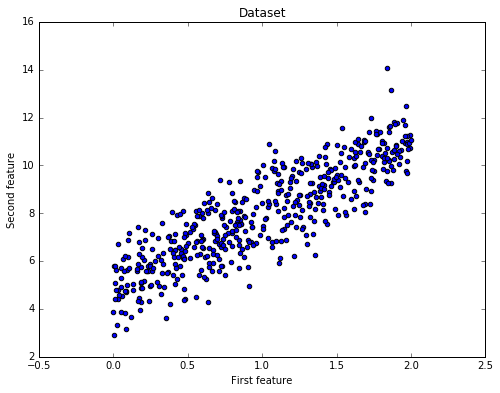

In [3]:
# 采用简单训练集合
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [4]:
# 将该数据集合分成训练结合和测试集合
X_train, X_test, y_train, y_test = train_test_split(X, y)

print "Shape X_train: {0}".format(X_train.shape)
print "Shape y_train: {0}".format(y_train.shape)
print "Shape X_test: {0}".format(X_test.shape)
print "Shape y_test: {0}".format(y_test.shape)

Shape X_train: (375L, 1L)
Shape y_train: (375L, 1L)
Shape X_test: (125L, 1L)
Shape y_test: (125L, 1L)


## 线性回归类

**PY2 VS PY3**

- 整数除法：PY2会默认丢弃小数部分取整；PY3会自动转为浮点数除法。

In [13]:
class LinearRegression:
    def __init__(self): pass
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        '''采用梯度下降方法训练线性回归模型'''
        # 第一步：初始化参数
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []
        
        for i in xrange(n_iters):
            # 第二步：计算一个输入特征和权重的线性组合
            y_predict = np.dot(X, self.weights) + self.bias
            
            # 第三步：计算训练集合的成本
            cost = (1.0 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)
            
            if i%100 == 0:
                print "Cost at iteration {i} is {cost}".format(i=i, cost=cost)
            
            # 第四步：计算梯度
            dJ_dw = (2.0 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2.0 / n_samples) * np.sum((y_predict - y))
            
            # 第五步：更新参数
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db
            
        return self.weights, self.bias, costs
    def train_normal_equation(self, X, y):
        '''采用正规函数方法训练线性回归模型'''
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

### 采用梯度下降方法训练

Cost at iteration 0 is 66.45256981
Cost at iteration 100 is 2.20843461461
Cost at iteration 200 is 1.27978128542
Cost at iteration 300 is 1.20421891954
Cost at iteration 400 is 1.15648678166
Cost at iteration 500 is 1.12139104139


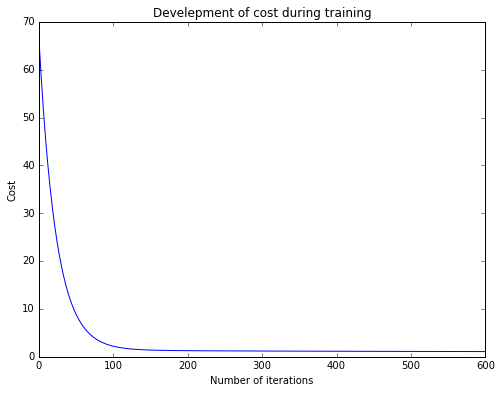

In [14]:
regressor = LinearRegression()
n_iters = 600
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=n_iters)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.title("Develepment of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

### 测试梯度下降模型

In [25]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train = (1.0 / n_samples) * np.sum((y_p_train - y_train)**2)
error_test = (1.0 / n_samples_test) * np.sum((y_p_test - y_test)**2)

print "Error on training set: {0}".format(np.round(error_train, 4))
print "Error on test set: {0}".format(error_test)

Error on training set: 1.0955
Error on test set: 1.13786379114


### 采用正规方程方法训练

In [18]:
# 通过正规方程计算参数，给每个输入样本加一偏置
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)

### 测试正规方程模型

In [20]:
y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train = (1.0 / n_samples) * np.sum((y_p_train - y_train)**2)
error_test = (1.0 / n_samples) * np.sum((y_p_test - y_test)**2)

print "Error on training set: {0}".format(np.round(error_train, 4))
print "Error on test set: {0}".format(np.round(error_test, 4))

Error on training set: 1.0228
Error on test set: 0.3477


### 预测可视化

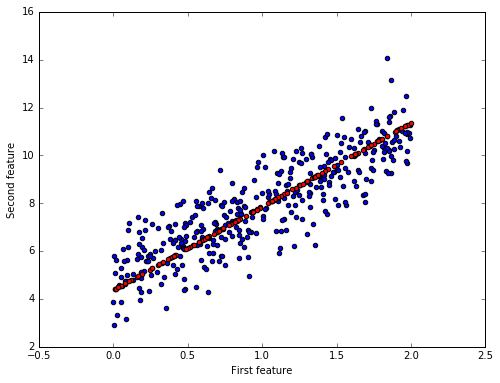

In [26]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test, c="red")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()